In [2]:
from funkcije import *

In [3]:
baza_location = biraj_bazu()

FileChooser(path='/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija/baza/emodb/wav', filen…

In [ ]:
baza = ucitaj_bazu(baza_location)

## Učitavanje fičera
---

In [5]:
nemci = pd.read_csv("baza.csv")

In [63]:
nemci.head()

,filename,kod govornika,kod recenice,kod emocije,naziv emocije,pol,godiste,hurstovi,duzine,odnos tišine i govora,najduža priča,zcr prosek,zcr mean,zcr max,zcr med,zcr stdev,pitch prosek,pitch mean,pitch max,pitch med,pitch stdev,,tuga
0,03a01Nc.wav,3,a01,N,Neutralno,M,31,0.219143,1.611293,1.842320,0.263039,0.065744,0.000000,0.431250,0.035417,0.087421,125.117673,84.821595,168.666118,135.040393,31.002138,NaN,False
1,03a01Wa.wav,3,a01,W,Bes,M,31,0.217466,1.877823,2.234844,0.321995,0.121496,0.008333,0.483333,0.100000,0.102921,198.723355,145.145870,242.699341,206.456359,33.108532,NaN,False
2,03a02Fc.wav,3,a02,F,Sreća,M,31,0.207349,2.006259,2.301343,0.630385,0.102151,0.000000,0.581250,0.068750,0.109192,246.225769,138.591315,367.863412,233.081881,58.732548,NaN,False
3,03a02Nc.wav,3,a02,N,Neutralno,M,31,0.200783,1.439819,2.919506,0.530612,0.065946,0.000000,0.458333,0.037500,0.086506,118.174506,86.804206,142.652351,127.088797,21.225259,NaN,False
4,03a02Ta.wav,3,a02,T,Tuga,M,31,0.210646,1.735692,2.560186,0.476190,0.104857,0.000000,0.539583,0.041667,0.136666,104.426879,86.304251,117.895081,105.947010,9.532461,NaN,True


In [65]:
nemci.columns = [
    "filename",
    "kod govornika",
    "kod recenice",
    "kod emocije",
    "naziv emocije",
    "pol",
    "godiste",
    "hurstovi",
    "duzine",
    "odnos tišine i govora",
    "najduža priča",
    
    "zcr prosek",
    "zcr mean",
    "zcr max",
    "zcr med",
    "zcr stdev",

    "pitch prosek",
    "pitch mean",
    "pitch max",
    "pitch med",
    "pitch stdev", 

    # "tuga",
    ""

]

In [66]:
nemci.head()

,filename,kod govornika,kod recenice,kod emocije,naziv emocije,pol,godiste,hurstovi,duzine,odnos tišine i govora,najduža priča,zcr prosek,zcr mean,zcr max,zcr med,zcr stdev,pitch prosek,pitch mean,pitch max,pitch med,pitch stdev,tuga,
0,03a01Nc.wav,3,a01,N,Neutralno,M,31,0.219143,1.611293,1.842320,0.263039,0.065744,0.000000,0.431250,0.035417,0.087421,125.117673,84.821595,168.666118,135.040393,31.002138,NaN,False
1,03a01Wa.wav,3,a01,W,Bes,M,31,0.217466,1.877823,2.234844,0.321995,0.121496,0.008333,0.483333,0.100000,0.102921,198.723355,145.145870,242.699341,206.456359,33.108532,NaN,False
2,03a02Fc.wav,3,a02,F,Sreća,M,31,0.207349,2.006259,2.301343,0.630385,0.102151,0.000000,0.581250,0.068750,0.109192,246.225769,138.591315,367.863412,233.081881,58.732548,NaN,False
3,03a02Nc.wav,3,a02,N,Neutralno,M,31,0.200783,1.439819,2.919506,0.530612,0.065946,0.000000,0.458333,0.037500,0.086506,118.174506,86.804206,142.652351,127.088797,21.225259,NaN,False
4,03a02Ta.wav,3,a02,T,Tuga,M,31,0.210646,1.735692,2.560186,0.476190,0.104857,0.000000,0.539583,0.041667,0.136666,104.426879,86.304251,117.895081,105.947010,9.532461,NaN,True


### Dodavanje tuge
---

In [70]:
# nemci.describe()
nemci["tuga"] = (nemci["kod emocije"] == "T") * 1.0

### matrica korelacije za tugu

In [ ]:
corr_matrix =  nemci.drop(["kod emocije", "kod recenice", "filename", "naziv emocije", "pol", "godiste", "kod govornika", ""], axis=1).corr()

In [ ]:
corr_matrix["tuga"]

hurstovi                 0.064310
duzine                   0.448552
odnos tišine i govora    0.235202
najduža priča            0.151302
zcr prosek              -0.342580
zcr mean                -0.110403
zcr max                 -0.127996
zcr med                 -0.370813
zcr stdev               -0.066394
pitch prosek            -0.344293
pitch mean              -0.198171
pitch max               -0.323334
pitch med               -0.330572
pitch stdev             -0.298716
tuga                     1.000000
Name: tuga, dtype: float64

### malo histograma i informacije o bazi
---

<AxesSubplot:>

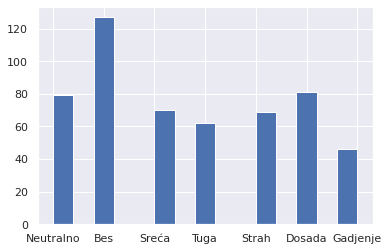

In [22]:
nemci["naziv emocije"].hist(bins=15)

<AxesSubplot:>

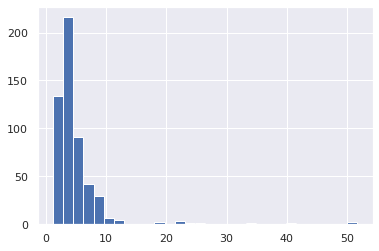

In [23]:
nemci["odnos tišine i govora"].hist(bins=30)

## note, valjalo bi obeležiti malo više stvari sa jedinicama da se vidi automatik po ovome

In [ ]:
nemci.info()

In [11]:
X = nemci.drop(["kod emocije", "kod recenice", "filename", "naziv emocije", "pol", "godiste", "kod govornika", "", "tuga"], axis=1)

y = nemci["tuga"]


X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=12345
)

X = X.values
y = y.values

In [37]:
nemci.drop(["kod emocije", "kod recenice", "filename", "naziv emocije", "pol", "godiste", "kod govornika"], axis=1)

,hurstovi,duzine,odnos tišine i govora,najduža priča,zcr prosek,zcr mean,zcr max,zcr med,zcr stdev,pitch prosek,pitch mean,pitch max,pitch med,pitch stdev,tuga,
0,0.219143,1.611293,1.842320,0.263039,0.065744,0.000000,0.431250,0.035417,0.087421,125.117673,84.821595,168.666118,135.040393,31.002138,False,False
1,0.217466,1.877823,2.234844,0.321995,0.121496,0.008333,0.483333,0.100000,0.102921,198.723355,145.145870,242.699341,206.456359,33.108532,False,False
2,0.207349,2.006259,2.301343,0.630385,0.102151,0.000000,0.581250,0.068750,0.109192,246.225769,138.591315,367.863412,233.081881,58.732548,False,False
3,0.200783,1.439819,2.919506,0.530612,0.065946,0.000000,0.458333,0.037500,0.086506,118.174506,86.804206,142.652351,127.088797,21.225259,False,False
4,0.210646,1.735692,2.560186,0.476190,0.104857,0.000000,0.539583,0.041667,0.136666,104.426879,86.304251,117.895081,105.947010,9.532461,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.190843,3.442721,5.196898,0.909297,0.089117,0.006250,0.552083,0.052083,0.106172,183.118664,129.310270,307.553386,162.920731,47.064121,False,False
530,0.173557,3.500635,2.859450,1.147392,0.092760,0.000000,0.645833,0.045833,0.119891,205.137150,175.625645,290.291740,200.578947,19.675079,True,True
531,0.209444,3.934195,2.490905,1.117914,0.072347,0.000000,0.593750,0.029167,0.106728,168.722891,143.478728,198.275102,167.694673,13.917855,True,True
532,0.229441,2.414150,2.024545,0.804989,0.149550,0.014583,0.487500,0.135417,0.096197,292.490362,141.013849,474.312161,300.528856,82.709656,False,False


In [ ]:
X_train


In [12]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [13]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 416 to 482
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hurstovi               427 non-null    float64
 1   duzine                 427 non-null    float64
 2   odnos tišine i govora  427 non-null    float64
 3   najduža priča          427 non-null    float64
 4   zcr prosek             427 non-null    float64
 5   zcr mean               427 non-null    float64
 6   zcr max                427 non-null    float64
 7   zcr med                427 non-null    float64
 8   zcr stdev              427 non-null    float64
 9   pitch prosek           427 non-null    float64
 10  pitch mean             427 non-null    float64
 11  pitch max              427 non-null    float64
 12  pitch med              427 non-null    float64
 13  pitch stdev            427 non-null    float64
dtypes: float64(14)
memory usage: 50.0 KB


In [15]:
train_preds = knn_model.predict(X_train)



mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.16995200681777647

In [16]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.37163163574904645

In [30]:
print(test_preds)
print(y_test)

[0.         0.         0.         0.         0.66666667 0.
 0.         0.         0.33333333 0.         0.         0.
 0.66666667 0.33333333 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.66666667 0.         0.33333333
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.33333333 0.         0.66666667
 0.         0.66666667 0.         0.         0.         0.
 0.33333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.33333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.33333333 0.
 0.         0.         0.         0.33333333 0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.33333333 0.         0.         0.         0.33333333
 0.         0.         0.3333333

In [24]:
X_test

,hurstovi,duzine,odnos tišine i govora,najduža priča,zcr prosek,zcr mean,zcr max,zcr med,zcr stdev,pitch prosek,pitch mean,pitch max,pitch med,pitch stdev
56,0.138606,1.619501,3.667974,0.673469,0.073420,0.000000,0.593750,0.037500,0.105497,223.934479,161.982376,295.365951,226.446492,32.177706
283,0.209300,2.362268,2.655298,0.702948,0.136917,0.000000,0.570833,0.104167,0.123913,313.451188,146.832384,526.282294,300.528856,76.915698
290,0.223582,1.669025,2.813679,0.312925,0.111634,0.012500,0.495833,0.093750,0.100127,282.726155,165.768535,367.863412,283.661468,52.940166
512,0.206600,3.216190,6.348912,1.498866,0.122128,0.000000,0.535417,0.087500,0.107371,320.728392,239.911701,372.137779,323.964753,29.826254
240,0.188191,3.889569,5.861200,1.002268,0.055226,0.000000,0.537500,0.014583,0.109802,102.834090,80.991188,118.578040,103.826174,7.262685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0.144705,3.063356,5.721095,0.839002,0.072880,0.000000,0.581250,0.031250,0.119658,169.766750,136.999458,212.505992,168.180395,17.176672
85,0.119348,3.055510,3.133374,0.476190,0.079456,0.000000,0.654167,0.037500,0.121479,201.729454,121.349670,318.399232,197.710708,45.281613
400,0.141193,2.770703,4.430578,0.517007,0.128775,0.008333,0.608333,0.110417,0.113506,315.717823,119.264956,491.038743,336.360790,76.207907
395,0.203577,4.243628,1.984753,0.537415,0.092660,0.000000,0.620833,0.041667,0.139220,202.723126,144.309891,238.529911,203.497284,21.826248


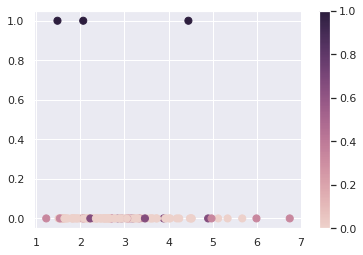

In [60]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test["duzine"], y_test[:], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


In [59]:
print(accuracy_score(y_test, a))    

0.822429906542056


In [57]:
a = (test_preds[:] == True) * 1.0

In [62]:
train_p = (train_preds[:] == True) * 1.0
print(accuracy_score(y_train, train_p))

0.9414519906323185
